In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import *
import tensorflow as tf
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import cv2

In [2]:
print("version:", tf.__version__)
print("GPU","사용가능" if tf.test.is_gpu_available() else"사용불가능")

version: 2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU 사용불가능


In [3]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_sample = pd.read_csv('sample_submission.csv')

In [4]:
x = cv2.imread('eight_grey2.jpg')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Testing my own data
test = cv2.imread('seven_grey.jpg')
test = cv2.cvtColor(test, cv2.COLOR_BGR2GRAY)
test_eight = cv2.imread('eight_grey.jpg')
test_eight = cv2.cvtColor(test_eight, cv2.COLOR_BGR2GRAY)
test_eight = cv2.bitwise_not(test_eight)

test_eight2 = cv2.imread('eight_grey2.jpg')
test_eight2 = cv2.cvtColor(test_eight2, cv2.COLOR_BGR2GRAY)
test_eight2 = cv2.bitwise_not(test_eight2)
test_eight2.shape

(28, 28)

In [6]:
#Testing my own data
test_one = cv2.imread('4.jpg')
test_one = cv2.cvtColor(test_one, cv2.COLOR_BGR2GRAY)
test_one = cv2.bitwise_not(test_one)

In [7]:
#Resizing my test data
test_resize = cv2.resize(test, dsize=(28, 28))
test_eight_resize = cv2.resize(test_eight, dsize=(28, 28))


In [8]:
#Resizing my test data
test_one_resize = cv2.resize(test_one, dsize=(28, 28))

In [9]:
test_resize = test_resize.reshape(-1,28,28,1)
test_resize.shape
test_eight_resize = test_eight_resize.reshape(-1,28,28,1)
test_eight2 = test_eight2.reshape(-1,28,28,1)



In [10]:
test_one_resize = test_one_resize.reshape(-1,28,28,1)
test_one_resize.shape

(1, 28, 28, 1)

In [11]:
#training dataset
y = data['label']
x = data.drop(['label'],axis=1)
x_test = data_test.values #Numpy array
type(x_test)

numpy.ndarray

In [12]:
type(x_test)

numpy.ndarray

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
#data scailing
#x_train = x / 255
#x_test = x_test / 255
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
test = test.astype('float32')/255
test_eight_resize = test_eight_resize.astype('float32')/255
test_eight2 = test_eight2.astype('float32')/255
#scale = MinMaxScaler()
#x_train = scale.fit_transform(x)
#x_test = scale.transform(x_test)

In [15]:
test_one_resize = test_one_resize.astype('float32')/255

In [16]:
#x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [18]:
#Change y categories into binary using one hot encoding
y_train1 = utils.to_categorical(y_train, 10)
y_val1 = utils.to_categorical(y_val, 10)

In [19]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

In [20]:
x_train1 = x_train.values.reshape(-1,28,28,1)
x_val1 = x_val.values.reshape(-1,28,28,1)

In [21]:
x_train1.shape, x_val1.shape, y_train.shape, y_val.shape

((29400, 28, 28, 1), (12600, 28, 28, 1), (29400,), (12600,))

In [22]:
x_test1 = x_test.reshape(-1,28,28,1)
x_test1.shape

(28000, 28, 28, 1)

KeyError: 1

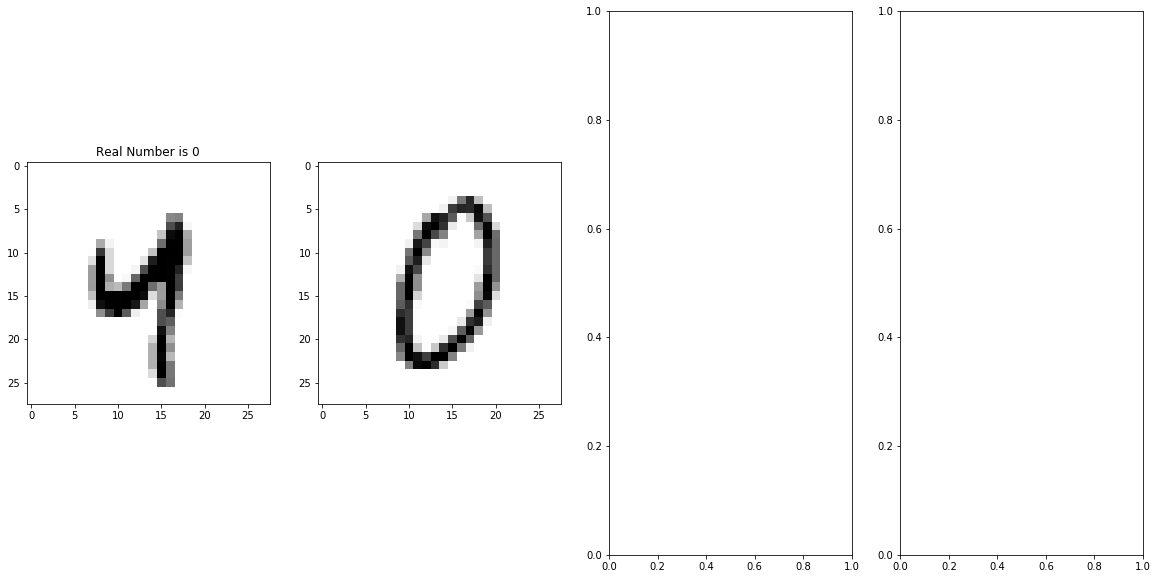

In [23]:
x_train__ = x_train1.reshape(x_train1.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

In [ ]:
plt.imshow(x_train__[0])

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'Same',  activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size = (3,3), padding = 'Same', activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=["accuracy"])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience= 3)

In [27]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [28]:
datagen.fit(x_train1)

In [29]:
model.fit_generator(datagen.flow(x_train1, y_train1,batch_size=64), epochs=30, validation_data=(x_val1, y_val1), callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
460/460 [==============================] - 19s 41ms/step - loss: 0.4754 - accuracy: 0.8474 - val_loss: 0.0818 - val_accuracy: 0.9737
Epoch 2/30
460/460 [==============================] - 19s 41ms/step - loss: 0.1727 - accuracy: 0.9473 - val_loss: 0.0510 - val_accuracy: 0.9826
Epoch 3/30
460/460 [==============================] - 18s 40ms/step - loss: 0.1319 - accuracy: 0.9594 - val_loss: 0.0397 - val_accuracy: 0.9874
Epoch 4/30
460/460 [==============================] - 18s 39ms/step - loss: 0.1087 - accuracy: 0.9668 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 5/30
460/460 [==============================] - 18s 39ms/step - loss: 0.0981 - accuracy: 0.9699 - val_loss: 0.0356 - val_accuracy: 0.9878
Epoch 6/30
460/460 [==============================] - 20s 43ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0321 - val_accuracy: 0.9890
Epoch 7/30
460/460 [==============================] - 18s 40

In [ ]:
#model.fit(x_train1, y_train1, epochs=30, batch_size=64,validation_data=(x_val1, y_val1), callbacks=[early_stop])

In [30]:
losses = pd.DataFrame(model.history.history)

In [31]:
loss = losses[['loss', 'val_loss']]

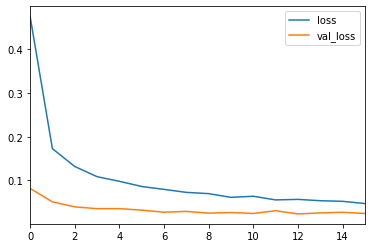

In [32]:
loss.plot()

In [33]:
prediction = model.predict_classes(test_resize)
prediction_8 = model.predict_classes(test_eight_resize)
prediction_8_2 = model.predict_classes(test_eight2)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
prediction_1 = model.predict_classes(test_one_resize)

In [35]:
print("The number 7: {}, the number 8: {}, the number 4: {}, the number 8: {}".format(prediction, prediction_8, prediction_1, prediction_8_2))

The number 7: [8], the number 8: [8], the number 4: [4], the number 8: [8]


In [36]:
pred = model.predict_classes(x_test1)

In [37]:
pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [38]:
x_test1[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [39]:
result = pd.Series(pred,name='Label')

In [40]:
a = range(1,28001)
submission= pd.DataFrame({
    'ImageId': a,
    'Label': result
})
#submission.set_index('ImageId',inplace=True)
submission.to_csv('submission_cnn.csv',index=False)